<a href="https://colab.research.google.com/github/angulartist/visualize_cnn_activations/blob/master/visualize_activations_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
# Check if we're using a GPU:
# Should print : /device:GPU:0 if True.
print('GPU Support:', tf.test.gpu_device_name())

import os

from google.colab import drive

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

GPU Support: /device:GPU:0


In [0]:
''' [Google Colab] Authorize Google Colab to have access to your Drive '''

drive.mount('/content/gdrive', force_remount=True)
root_dir  = '/content/gdrive/My Drive/'
workspace = 'deepl/'
base_dir  = os.path.join(root_dir, workspace)

print('Working on:', base_dir)

Mounted at /content/gdrive
Working on: /content/gdrive/My Drive/deepl/


## Chargement du model CNN entraîné sur MNIST (voir repo git)

In [0]:
model = load_model(os.path.join(base_dir, 'mnist_cnn_best.h5'))

# Affichage de l'architecture du réseau
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)

## Chargement du dataset MNIST

In [0]:
# Ici on ne récupère que le testing set pour la démo

(_, _), (X_ttest, _) = mnist.load_data()
# Affichage des dimensions du tenseur 3D sur chaque axe
# Nous avons 10 000 matrices 28x28
X_ttest.shape

(10000, 28, 28)

## Visualiser un tenseur

In [0]:
# Récupérer le tenseur à la position 420 (blaze it)
img_tensor = X_ttest[420]
# Ajout d'une dimension suplémentaire
img_tensor = np.expand_dims(img_tensor, axis=0)
# Normalisation des pixels dans un interval [0, 255]
img_tensor = img_tensor.astype('float32') / 255.0
# Affichage des dimensions : 1 matrice en 28x28
img_tensor.shape

(1, 28, 28)

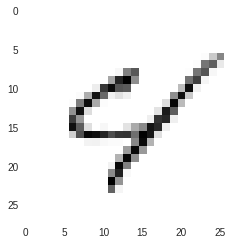

In [0]:
# Affichage du tenseur
plt.style.use('seaborn-dark')
plt.imshow(img_tensor[0])
plt.show()

In [0]:
# Ici on réorganise les dimensions du tenseur
# on obtient un tuple (nombre d'exemples, nombre de colonnes, nombre de lignes, nombre de canaux/profondeur)
img_tensor = img_tensor.reshape(-1, 28, 28, 1)
img_tensor.shape

(1, 28, 28, 1)

## Visualiser les couches d'activations du model

In [0]:
# On récupère toutes les couches d'activations
layer_outputs = [layer.output for layer in model.layers if layer.name.startswith('activation')]
layer_outputs

[<tf.Tensor 'activation/Relu:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'activation_1/Relu:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'activation_2/Relu:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'activation_3/Relu:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'activation_4/Relu:0' shape=(?, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'activation_5/Relu:0' shape=(?, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'activation_6/Relu:0' shape=(?, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'activation_7/Relu:0' shape=(?, 256) dtype=float32>,
 <tf.Tensor 'activation_8/Softmax:0' shape=(?, 10) dtype=float32>]

In [0]:
# On demande au model de fournir en sortie ces activations
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [0]:
# On fait ensuite une prédiction sur notre tenseur, l'image de test
# pour obtenir ses activations
activations = activation_model.predict(img_tensor)

In [0]:
# On prend la première couche d'activation à visualiser
first_layer_activation = activations[0]
# Il y a une matrice de 28x28x64 (un volume en 3D/tenseur 3D avec une profondeur de 64)
# C'est en réalité 64 matrices fusionnées en une seule
print(first_layer_activation.shape)

(1, 28, 28, 64)


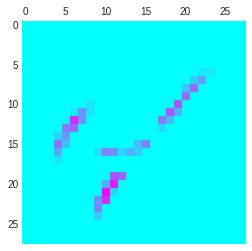

In [0]:
# On peut par exemple visualiser le 12ème canal de cette couche d'activation
plt.matshow(first_layer_activation[0, :, :, 12], cmap='cool')

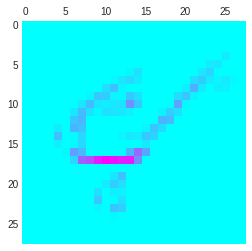

In [0]:
# Même opération poour le 27ème canal
plt.matshow(first_layer_activation[0, :, :, 27], cmap='cool')

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


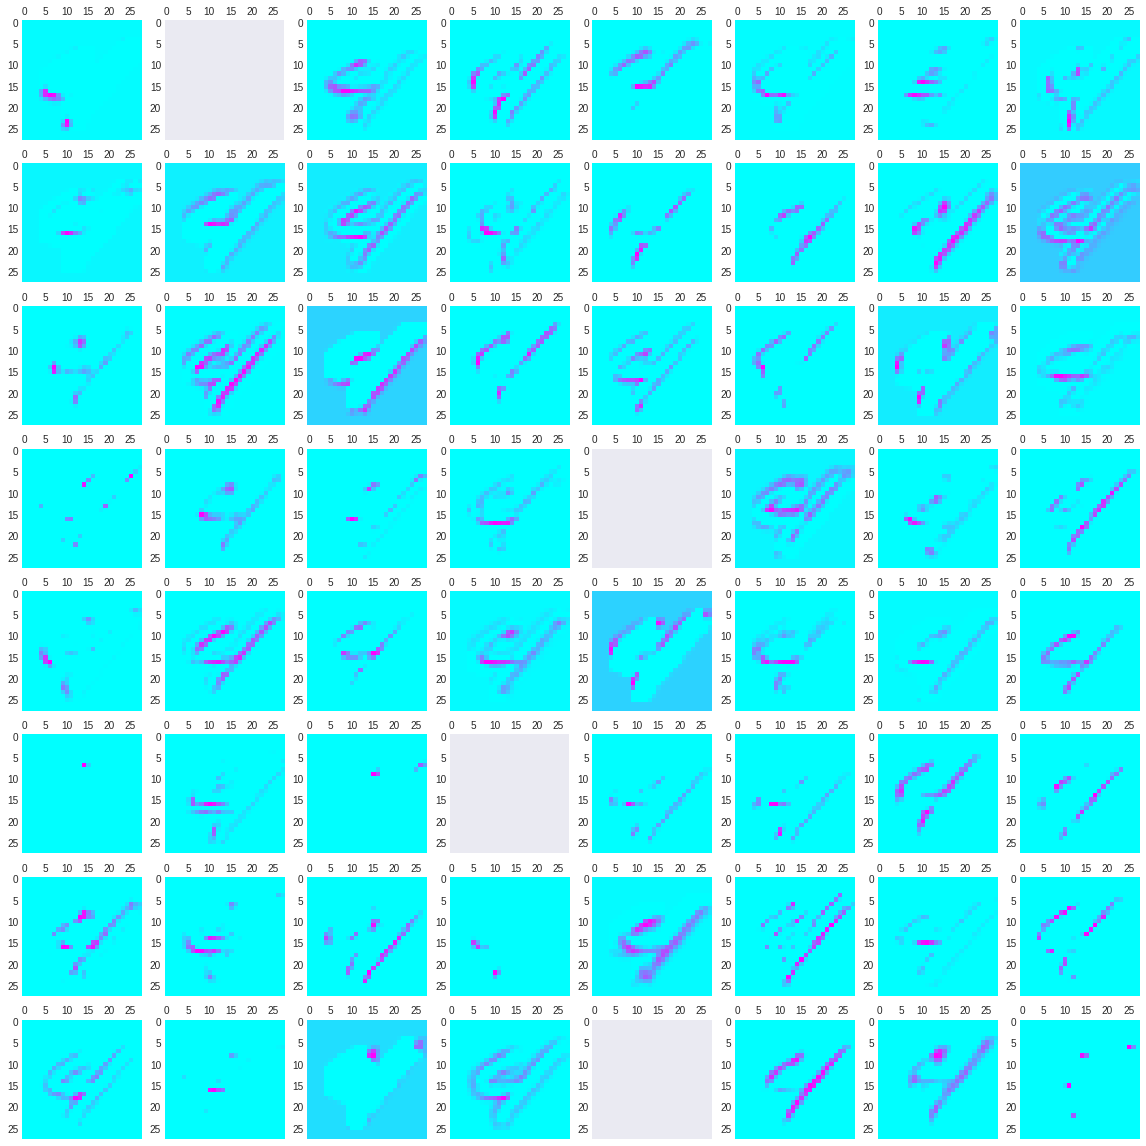

In [0]:
# On peut s'amuser à visualiser l'ensemble des canaux d'une couche d'activation

fig, ax = plt.subplots(
    nrows=8, # number of rows
    ncols=8, # number of columns
    figsize=[16, 16]
)

for index, axi in enumerate(ax.flat):
  axi.matshow(first_layer_activation[0, :, :, index], cmap='cool')

plt.tight_layout(True)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


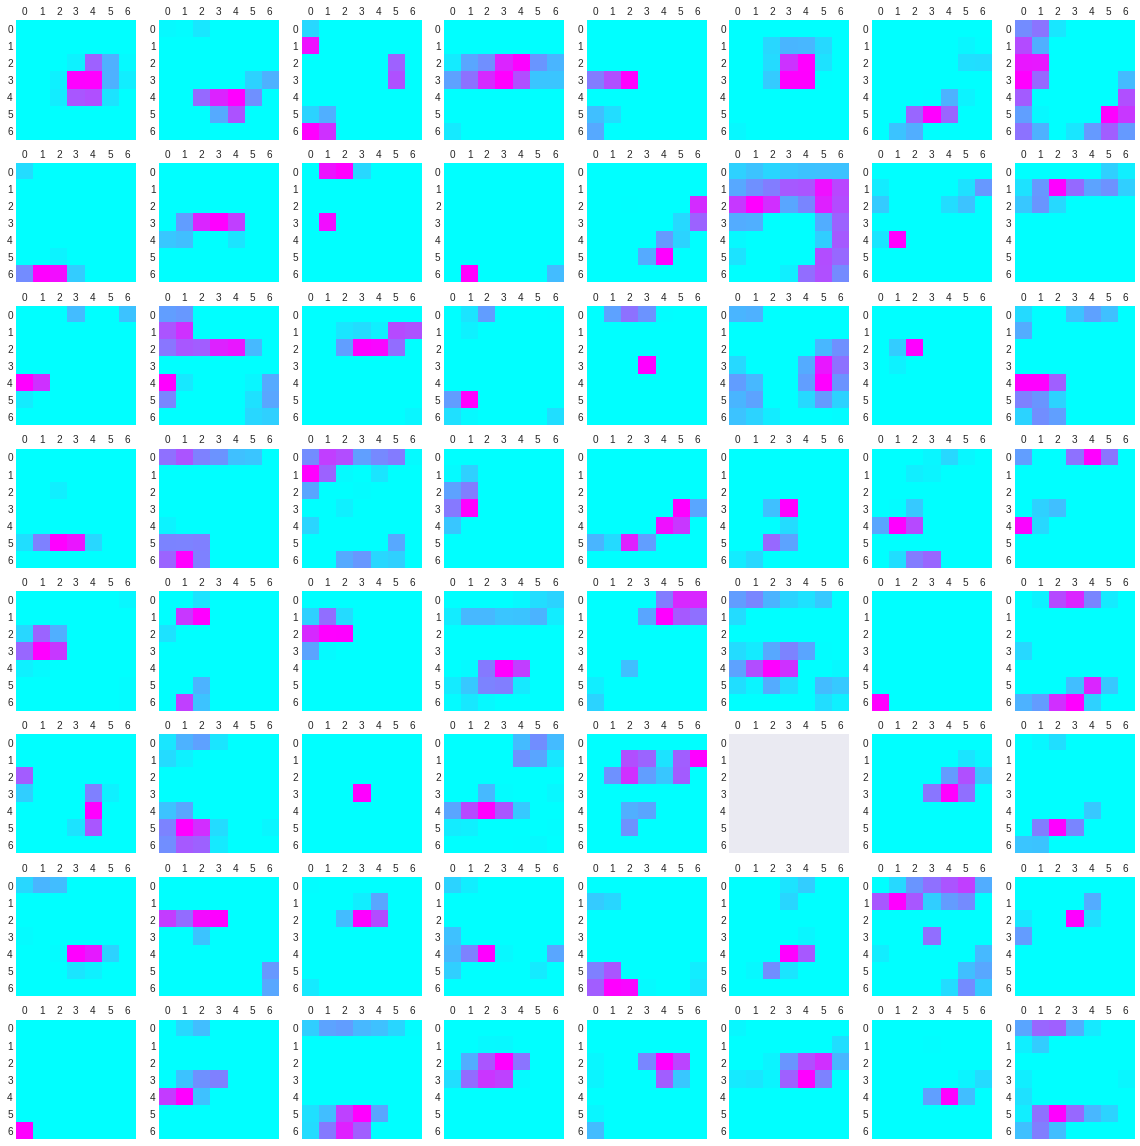

In [0]:
# La première couche d'activation semble d'être une combinaison
# de contours détectés par les filtres

# La 5ème couche d'activation est une combinaison
# des précédentes activations => plus on va "deep" dans
# la hierarchie, plus les représentations semblent abstraites pour nous.

fig, ax = plt.subplots(
    nrows=8, # number of rows
    ncols=8, # number of columns
    figsize=[16, 16]
)

for index, axi in enumerate(ax.flat):
  axi.matshow(activations[5][0, :, :, index], cmap='cool')

plt.tight_layout(True)
plt.show()